In [120]:
import umap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches


In [20]:
OUTPUT_PATH="data/outputs/coco/faster-rcnn/r-50-fpn-2x/final_feature_db_on_train.npy"
matrix = np.load(OUTPUT_PATH)
features = matrix[:, 7:]

# Trained on 1000 samples from each class

In [111]:
chosen_idencies = []
for class_idx in range(1,81):
    classes_indecies = np.where(matrix[:, 2]==class_idx)[0]
    chosen_idencies.extend(np.random.choice(classes_indecies, 1000))

In [112]:
features = matrix[chosen_idencies, 7:]
classes =  matrix[chosen_idencies, 2]

In [154]:
%%time 
config = {"n_neighbors" : 5, "min_dist" : 0.01, "metric" : 'euclidean'} 
embedding = umap.UMAP(**config).fit_transform(features)


/home.nfs/babayeln/miniconda3/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 6 separate connected components using meta-embedding (experimental)
  n_components


CPU times: user 1min 5s, sys: 21.8 s, total: 1min 26s
Wall time: 49.5 s


In [166]:
config = {"n_neighbors" : 15, "min_dist" : 0.01, "metric" : 'correlation'} 
embedding = umap.UMAP(**config).fit_transform(features)

### Show random 100

In [167]:
indecies = []
for class_idx in range(1,81):
    classes_indecies = np.where(classes==class_idx)[0]
    indecies.extend(np.random.choice(classes_indecies, 100))

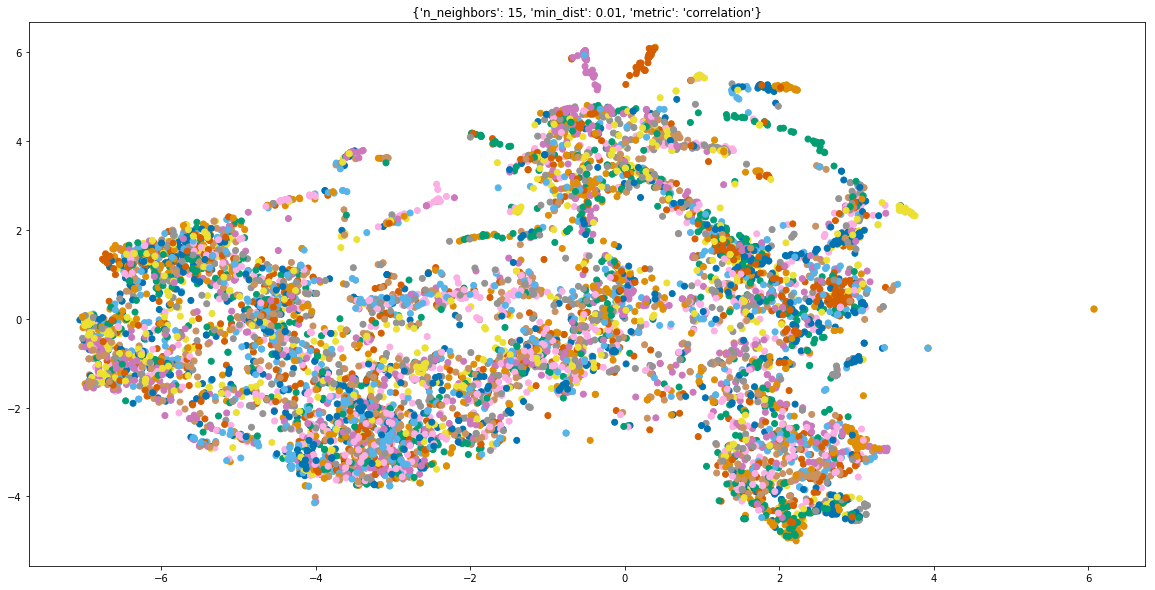

In [168]:

plt.figure(figsize = (20,10))
plt.scatter(embedding[indecies, 0], embedding[indecies, 1], c=[sns.color_palette("colorblind", 81)[int(x)] for x in classes[indecies]])
#plt.gca().set_aspect('equal', 'datalim')
plt.title(config)
plt.savefig("100_samples_all_classes"+str(config["n_neighbors"])+"_"+ str(config["min_dist"]) + "_" +config["metric"] + ".png")


# Show the person class

In [169]:
indecies = []
classes_indecies = np.where(classes==1)[0]
indecies = np.random.choice(classes_indecies, 10000)

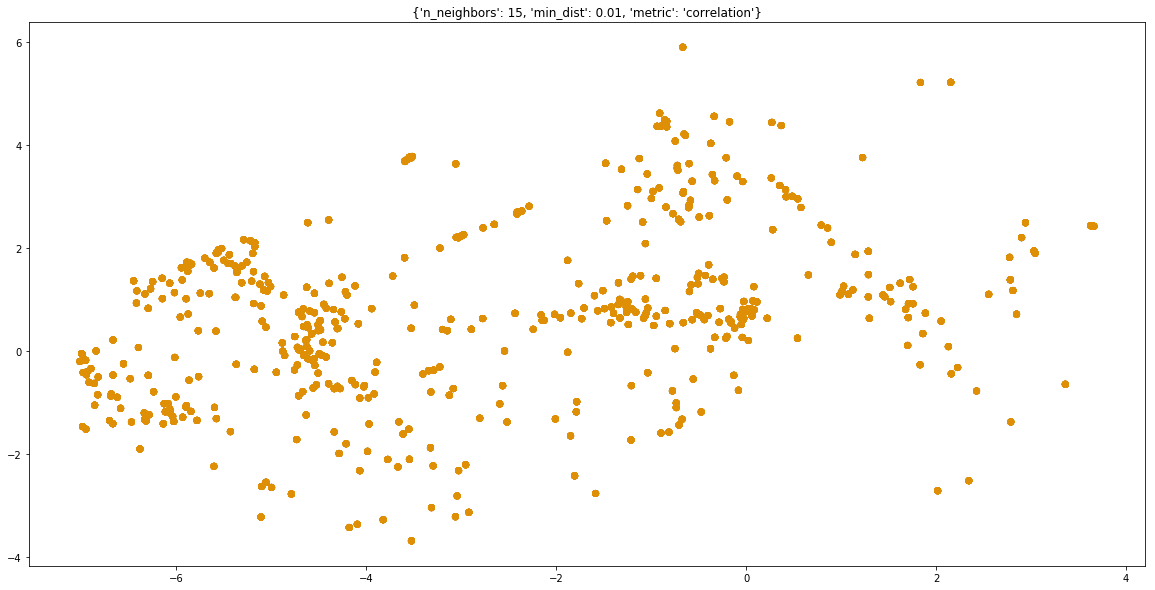

In [170]:

plt.figure(figsize = (20,10))
plt.scatter(embedding[indecies, 0], embedding[indecies, 1], c=[sns.color_palette("colorblind", 81)[int(x)] for x in classes[indecies]])
#plt.gca().set_aspect('equal', 'datalim')
plt.title(config)
plt.savefig("person_"+str(config["n_neighbors"])+"_"+ str(config["min_dist"]) + "_" +config["metric"] + ".png")
